# Polynomial regression - overfitting and underfitting

In [289]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
samples = 100
X = np.random.uniform(-3, 3, (samples, 1))
epsilon = np.random.randn(samples, 1)
f = lambda x: x**2 + 0.5*x + 3
y = f(X) + epsilon

f(X).shape, X.shape



((100, 1), (100, 1))

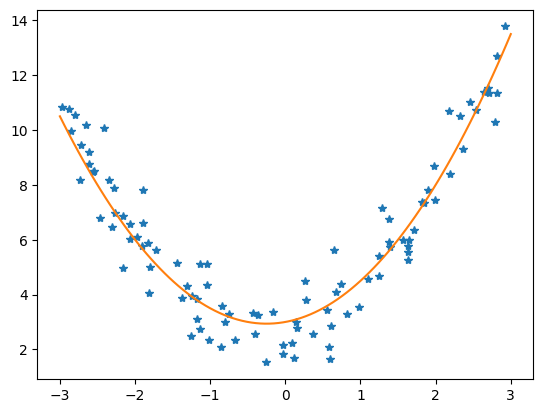

In [290]:
x = np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, '*')
plt.plot(x, f(x))

<Axes: title={'center': '$y = x^2+0.5x+3+ \\epsilon $'}, xlabel='x', ylabel='y'>

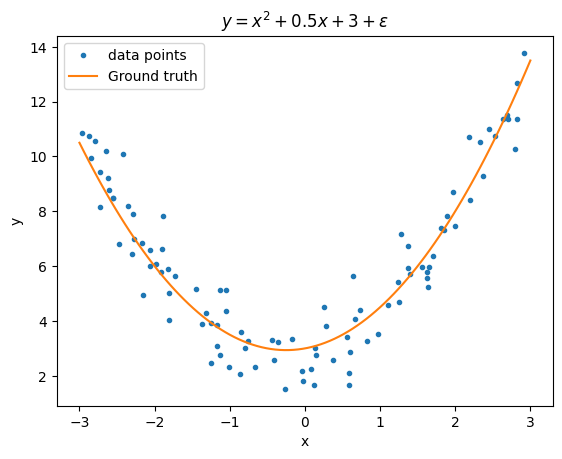

In [291]:
def draw_data():
    fig, ax = plt.figure(), plt.axes()
    ax.plot(X, y, ".", label="data points")
    x = np.linspace(-3, 3, samples).reshape(-1, 1)
    ax.plot(x, f(x), label="Ground truth")
    ax.set(title=r"$y = x^2+0.5x+3+ \epsilon $", xlabel="x", ylabel="y")
    ax.legend()
    return ax


draw_data()


In [292]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_instance = PolynomialFeatures(degree=22, include_bias=False)

polynomial_features = polynomial_instance.fit_transform(X)



In [293]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(polynomial_features, y)
model.coef_ # beta_1, beta_2


array([[ 9.40257003e-01,  6.77408253e+00, -1.74071151e-01,
        -2.35701495e+01, -6.78481789e+00,  3.92209303e+01,
         1.43755300e+01, -3.32540117e+01, -1.23957612e+01,
         1.63090604e+01,  5.71970991e+00, -4.94696731e+00,
        -1.55771291e+00,  9.55889966e-01,  2.58524847e-01,
        -1.17565069e-01, -2.57144796e-02,  8.87823603e-03,
         1.40958548e-03, -3.73519616e-04, -3.27550820e-05,
         6.65986743e-06]])

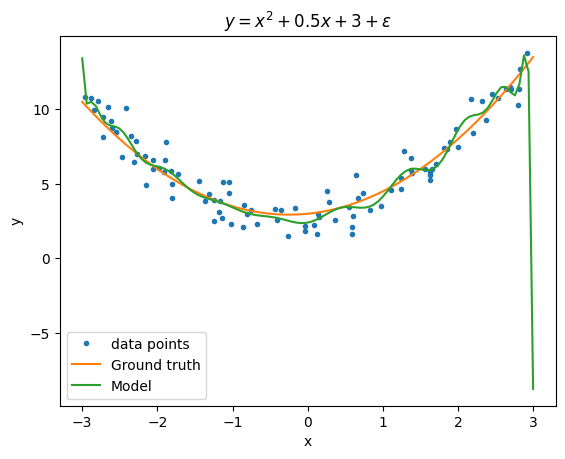

In [294]:
x = np.linspace(-3, 3, samples).reshape(-1, 1)
x_polynomial_features = polynomial_instance.transform(x)

y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred, label="Model")
ax.legend()


## Underfitting

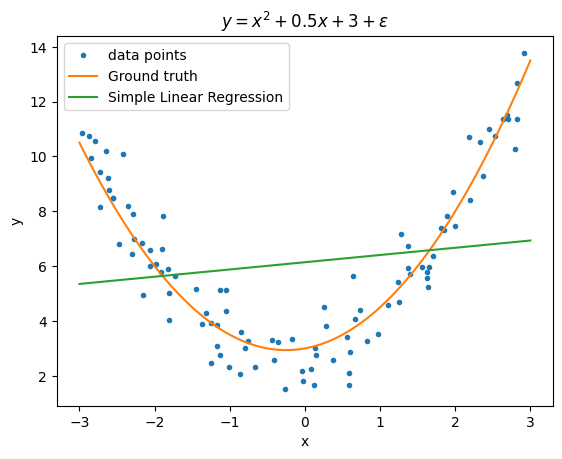

In [295]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(x)

ax = draw_data()
ax.plot(x, y_pred, label="Simple Linear Regression")
ax.legend();



## Overfitting

X_features.shape=(100, 30)


[Text(0.5, 1.0, 'Overfitted, the model is too complex'), (0.0, 15.0)]

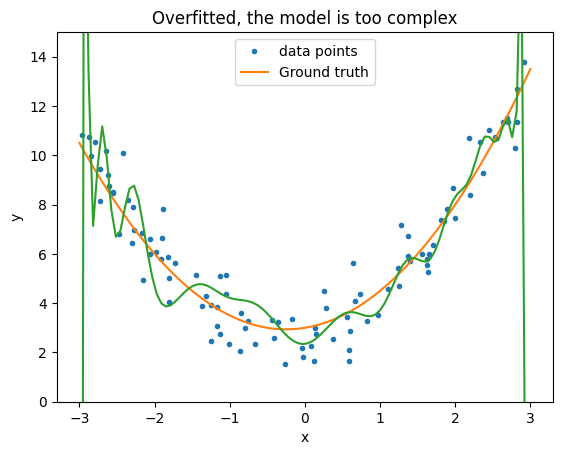

In [296]:
polynomial_instance = PolynomialFeatures(30, include_bias=False)

X_features = polynomial_instance.fit_transform(X)

print(f"{X_features.shape=}")
model = LinearRegression()
model.fit(X_features, y)

x_polynomial_features = polynomial_instance.transform(x)

y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred)
ax.set(title = "Overfitted, the model is too complex", ylim=[0, 15])

## Choose a model

In [297]:
np.random.seed(42)


samples = 10000
X = np.random.uniform(-3, 3, (samples, 1))
f = lambda x: x**4 + x**2 + 0.5*x + 3
y = f(X) + np.random.randn(samples, 1)

X.shape, y.shape



((10000, 1), (10000, 1))

## Train|val|test split

In [298]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape


((6700, 1), (1650, 1), (1650, 1), (6700, 1), (1650, 1), (1650, 1))

## Elbow

In [299]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1, 100):
    model_poly = PolynomialFeatures(degree, include_bias=False)
    train_features = model_poly.fit_transform(X_train) # feature engineering on train data
    val_features = model_poly.transform(X_val) # feature engineering on validation data
    model_linear_regression = LinearRegression()

    model_linear_regression.fit(train_features, y_train)

    y_pred_val = model_linear_regression.predict(val_features)

    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))




Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

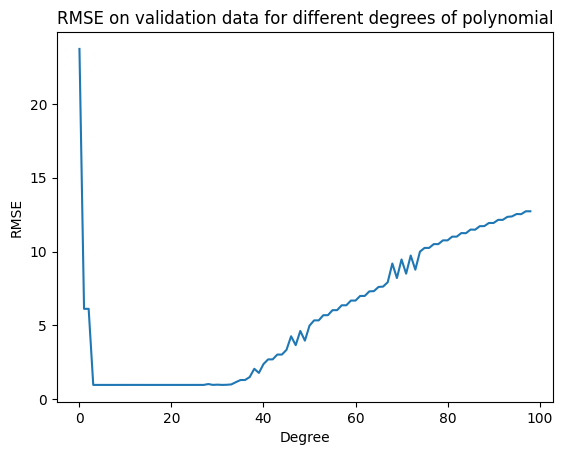

In [300]:
plt.plot(RMSE_val)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

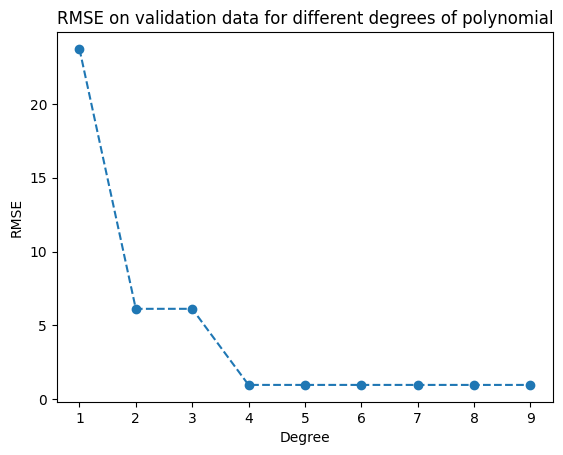

In [301]:
plt.plot(range(1, 10), RMSE_val[:9], 'o--')
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")